# Review Fungsi Multivariabel

Fungsi multivariabel adalah fungsi yang memiliki lebih dari satu variabel input. Dalam machine learning, kita sering bekerja dengan fungsi multivariabel karena data yang kita proses biasanya memiliki banyak fitur atau dimensi.

## Apa itu Fungsi Multivariabel?

Fungsi multivariabel adalah fungsi yang memetakan beberapa variabel input ke satu atau lebih output:

\[ f(x_1, x_2, ..., x_n) = y \]

Contoh sederhana fungsi multivariabel:
- \[ f(x, y) = x^2 + y^2 \]
- \[ f(x, y, z) = x^2 + 2y + 3z \]

## Konsep Penting dalam Fungsi Multivariabel

1. **Domain dan Range**
   - Domain: himpunan semua nilai input yang valid
   - Range: himpunan semua nilai output yang mungkin

2. **Grafik**
   - Fungsi dua variabel membentuk permukaan dalam ruang 3D
   - Visualisasi menggunakan contour plot atau surface plot

3. **Level Curves/Surfaces**
   - Kurva/permukaan di mana fungsi memiliki nilai konstan
   - Berguna untuk memahami perilaku fungsi

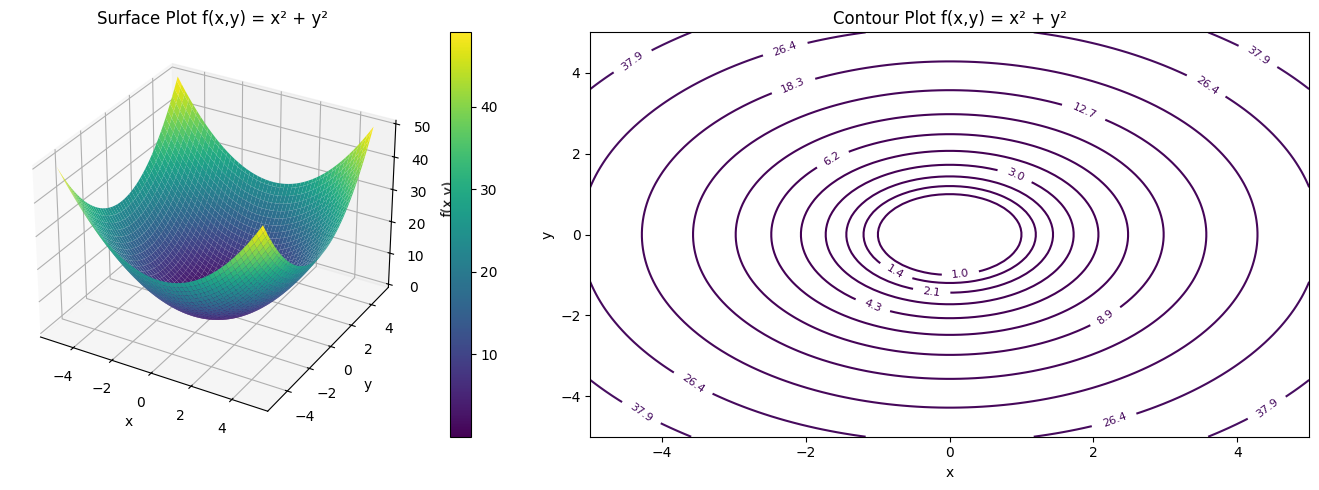

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Buat grid points
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Fungsi multivariabel sederhana: f(x,y) = x^2 + y^2
Z = X**2 + Y**2

# Plot 3D Surface
fig = plt.figure(figsize=(15, 5))

# Surface plot
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap='viridis')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x,y)')
ax1.set_title('Surface Plot f(x,y) = x² + y²')
fig.colorbar(surf)

# Contour plot
ax2 = fig.add_subplot(122)
contour = ax2.contour(X, Y, Z, levels=np.logspace(0, 3, 20))
ax2.clabel(contour, inline=True, fontsize=8)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Contour Plot f(x,y) = x² + y²')

plt.tight_layout()
plt.show()

## Turunan Parsial

Turunan parsial adalah turunan fungsi multivariabel terhadap satu variabel, dengan menganggap variabel lain konstan.

Untuk fungsi \( f(x, y) \), turunan parsialnya adalah:

1. Terhadap x: \[ \frac{\partial f}{\partial x} = \lim_{h \to 0} \frac{f(x+h, y) - f(x, y)}{h} \]
2. Terhadap y: \[ \frac{\partial f}{\partial y} = \lim_{h \to 0} \frac{f(x, y+h) - f(x, y)}{h} \]

### Gradien

Gradien adalah vektor yang berisi semua turunan parsial:

\[ \nabla f(x, y) = \begin{bmatrix} 
\frac{\partial f}{\partial x} \\
\frac{\partial f}{\partial y}
\end{bmatrix} \]

### Aplikasi dalam Machine Learning

1. **Optimisasi**
   - Gradient descent menggunakan turunan parsial
   - Mencari minimum fungsi cost

2. **Neural Networks**
   - Backpropagation menggunakan chain rule untuk turunan parsial
   - Update bobot berdasarkan gradien

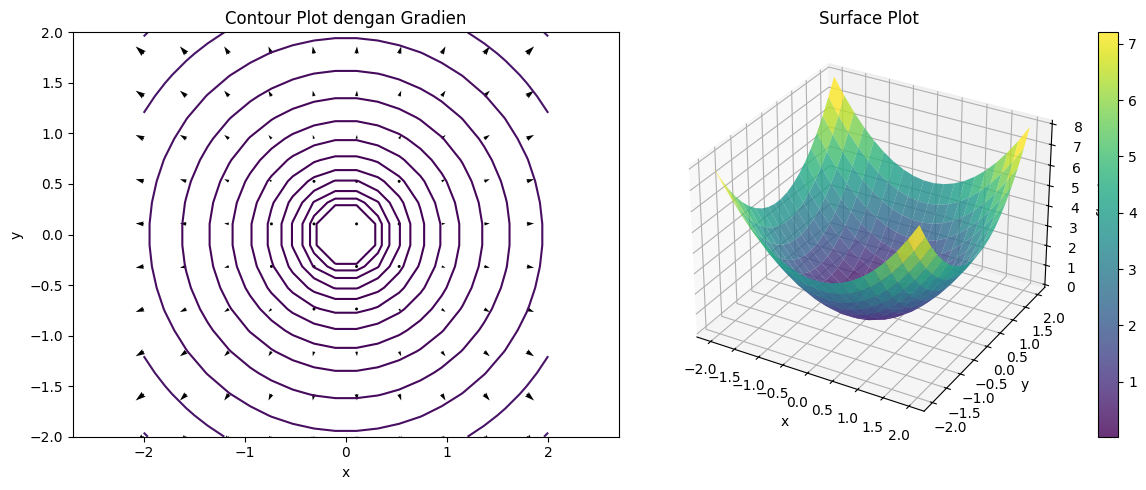

Gradien di titik (1.0, 1.0):
∂f/∂x = 2.0
∂f/∂y = 2.0
||∇f|| = 2.8284271247461903


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f(x, y):
    return x**2 + y**2

def partial_x(x, y):
    return 2*x

def partial_y(x, y):
    return 2*y

# Buat grid points
x = np.linspace(-2, 2, 20)
y = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Hitung gradien di setiap titik
dx = partial_x(X, Y)
dy = partial_y(X, Y)

# Plot
plt.figure(figsize=(12, 5))

# Contour plot dengan gradien
plt.subplot(121)
plt.contour(X, Y, Z, levels=np.logspace(-1, 2, 20))
plt.quiver(X[::2, ::2], Y[::2, ::2], 
          dx[::2, ::2], dy[::2, ::2],
          angles='xy', scale_units='xy', scale=50)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour Plot dengan Gradien')
plt.axis('equal')

# Surface plot
ax = plt.subplot(122, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
plt.colorbar(surf)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
ax.set_title('Surface Plot')

plt.tight_layout()
plt.show()

# Contoh perhitungan gradien di titik tertentu
x0, y0 = 1.0, 1.0
grad = np.array([partial_x(x0, y0), partial_y(x0, y0)])
print(f"Gradien di titik ({x0}, {y0}):")
print(f"∂f/∂x = {grad[0]}")
print(f"∂f/∂y = {grad[1]}")
print(f"||∇f|| = {np.linalg.norm(grad)}")

## Turunan Berarah dan Aturan Rantai

### Turunan Berarah (Directional Derivative)

Turunan berarah mengukur laju perubahan fungsi dalam arah tertentu. Untuk vektor unit \(\mathbf{u}\), turunan berarah diberikan oleh:

\[ D_{\mathbf{u}}f = \nabla f \cdot \mathbf{u} \]

### Aturan Rantai (Chain Rule)

Aturan rantai untuk fungsi multivariabel:

Jika \(z = f(x, y)\) di mana \(x = g(t)\) dan \(y = h(t)\), maka:

\[ \frac{dz}{dt} = \frac{\partial f}{\partial x}\frac{dx}{dt} + \frac{\partial f}{\partial y}\frac{dy}{dt} \]

### Aplikasi dalam Deep Learning

1. **Backpropagation**
   - Menggunakan aturan rantai untuk menghitung gradien
   - Propagasi error dari output ke input

2. **Update Parameter**
   - Gradien digunakan untuk memperbarui bobot
   - Optimisasi dengan gradient descent

Evaluasi turunan berarah di titik (1, 1):
Arah (1, 0): 2.0000
Arah (0, 1): 2.0000
Arah (1, 1): 2.8284
Arah (-1, 1): 0.0000


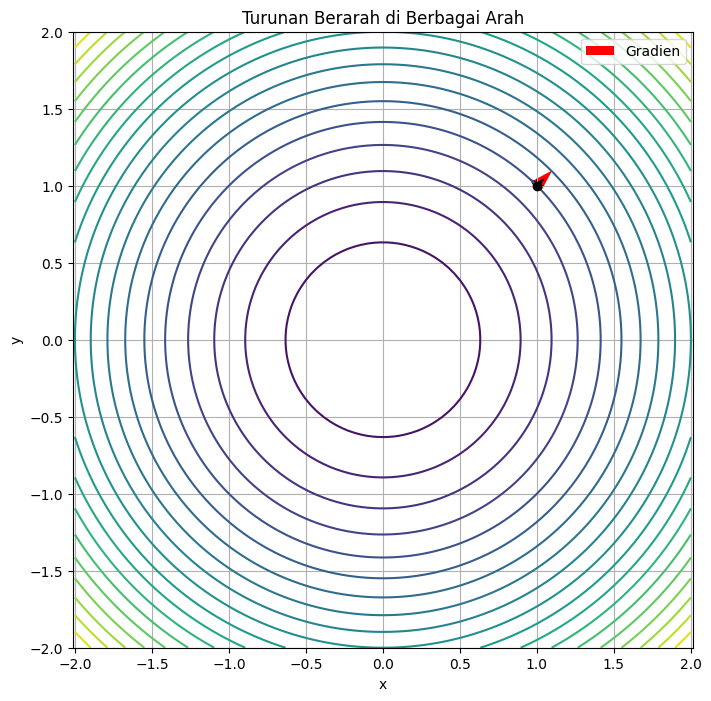

In [5]:
import numpy as np

def directional_derivative(f, grad_f, point, direction):
    """
    Menghitung turunan berarah
    f: fungsi
    grad_f: fungsi gradien
    point: titik evaluasi (x, y)
    direction: vektor arah
    """
    # Normalisasi vektor arah
    direction = np.array(direction)
    direction = direction / np.linalg.norm(direction)
    
    # Hitung gradien di titik tersebut
    gradient = grad_f(*point)
    
    # Turunan berarah adalah dot product dari gradien dan vektor arah
    return np.dot(gradient, direction)

# Fungsi dan gradiennya
def f(x, y):
    return x**2 + y**2

def grad_f(x, y):
    return np.array([2*x, 2*y])

# Titik evaluasi
point = (1, 1)

# Beberapa arah untuk dievaluasi
directions = [
    (1, 0),    # arah x
    (0, 1),    # arah y
    (1, 1),    # diagonal
    (-1, 1)    # diagonal lain
]

print(f"Evaluasi turunan berarah di titik {point}:")
for direction in directions:
    d = directional_derivative(f, grad_f, point, direction)
    print(f"Arah {direction}: {d:.4f}")

# Visualisasi
plt.figure(figsize=(8, 8))
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.contour(X, Y, Z, levels=20)
plt.quiver(point[0], point[1], 
          grad_f(*point)[0], grad_f(*point)[1],
          color='r', angles='xy', scale_units='xy', scale=20,
          label='Gradien')

for direction in directions:
    plt.quiver(point[0], point[1], 
              direction[0], direction[1],
              angles='xy', scale_units='xy', scale=20)

plt.plot(point[0], point[1], 'ko')
plt.axis('equal')
plt.grid(True)
plt.title('Turunan Berarah di Berbagai Arah')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Kesimpulan

Dalam notebook ini, kita telah mempelajari:
1. Konsep dasar fungsi multivariabel
2. Visualisasi fungsi dua variabel dengan surface dan contour plots
3. Turunan parsial dan gradien
4. Turunan berarah dan aplikasinya
5. Aturan rantai untuk fungsi multivariabel

Konsep-konsep ini sangat penting dalam machine learning, terutama untuk:
- Optimisasi fungsi cost
- Gradient descent
- Backpropagation dalam neural networks
- Feature engineering dan analisis

## Latihan

1. Hitung turunan parsial dari fungsi berikut:
   \[ f(x, y) = x^3y + xy^2 - 2x^2y \]

2. Visualisasikan fungsi berikut dan gambar gradiennya:
   \[ f(x, y) = xe^{-x^2-y^2} \]

3. Implementasikan gradient descent untuk menemukan minimum dari fungsi:
   \[ f(x, y) = (x-2)^2 + (y+1)^2 \]

4. Hitung turunan berarah dari fungsi pada soal nomor 1 di titik (1,1) dalam arah vektor [1,1].

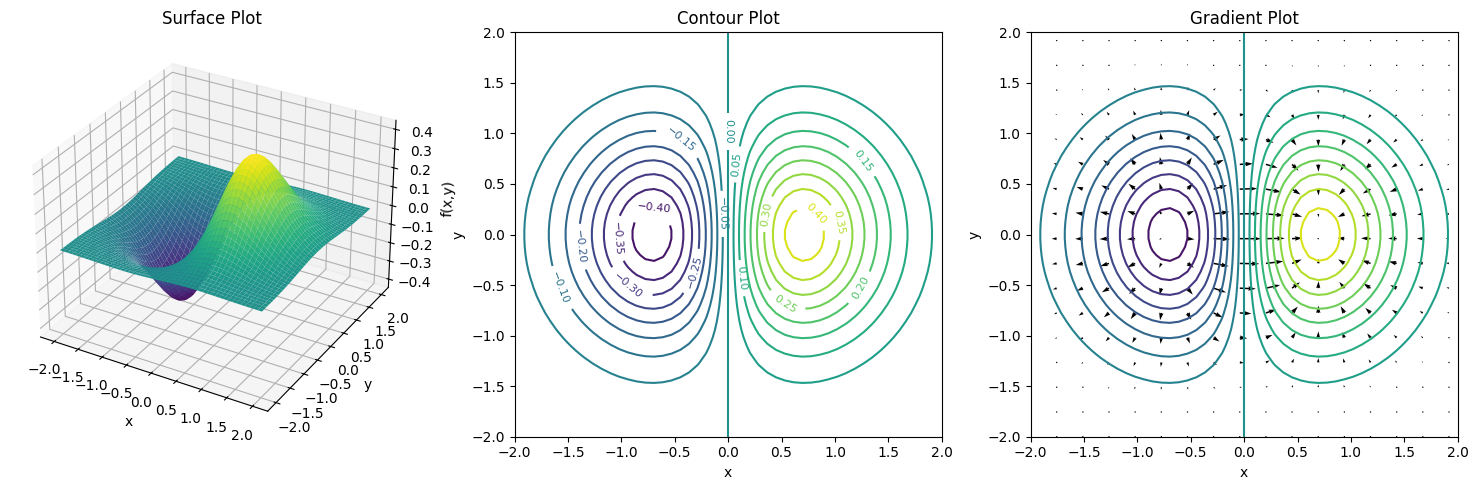


Nilai gradien di beberapa titik:
Gradien di (0,0): [1.0000, 0.0000]
Gradien di (1,0): [-0.3679, 0.0000]
Gradien di (0,1): [0.3679, 0.0000]
Gradien di (1,1): [-0.1353, -0.2707]


In [6]:
# Solusi Latihan 2
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return x * np.exp(-x**2 - y**2)

def partial_x(x, y):
    return (1 - 2*x**2) * np.exp(-x**2 - y**2)

def partial_y(x, y):
    return -2*x*y * np.exp(-x**2 - y**2)

# Buat grid
x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Hitung gradien
dx = partial_x(X, Y)
dy = partial_y(X, Y)

# Plot
plt.figure(figsize=(15, 5))

# Surface plot
ax1 = plt.subplot(131, projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap='viridis')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x,y)')
ax1.set_title('Surface Plot')

# Contour plot
ax2 = plt.subplot(132)
contour = ax2.contour(X, Y, Z, levels=20)
ax2.clabel(contour, inline=True, fontsize=8)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Contour Plot')

# Gradient plot
ax3 = plt.subplot(133)
ax3.contour(X, Y, Z, levels=20)
# Plot gradien setiap beberapa titik
skip = 3
ax3.quiver(X[::skip, ::skip], Y[::skip, ::skip],
           dx[::skip, ::skip], dy[::skip, ::skip],
           angles='xy', scale_units='xy', scale=5)
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_title('Gradient Plot')

plt.tight_layout()
plt.show()

# Tampilkan beberapa nilai gradien di titik-titik tertentu
points = [(0,0), (1,0), (0,1), (1,1)]
print("\nNilai gradien di beberapa titik:")
for x, y in points:
    grad = [partial_x(x,y), partial_y(x,y)]
    print(f"Gradien di ({x},{y}): [{grad[0]:.4f}, {grad[1]:.4f}]")